## kMeans Clusters Exercises

These exercises should be saved as a pdf file, and then submitted to Moodle. To save as a pdf, use:
* File -> Download as -> PDF via Latex (if you have Latex on your computer).
* Print to PDF on your browser.

To make the notebooks easy to read, please follow these guidelines:
* Keep lines to less than 80 characters.
* Suppress unrequired output, e.g., by using semi-colons at the end of the last line of cells.

For these exercises we will use the penguins dataset from `seaborn`. After loading the dataset, remove any rows with missing values and create a numeric classification for `species`.

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.metrics import confusion_matrix
from logitplots import plt_confusion_matrix, plt_decision_boundaries
from scipy.stats import mode

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
                how='any',inplace=True)
penguins['code'] = penguins.species.astype('category').cat.codes 
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,2
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,2


### Exercise 1

Using all the numerical features, model the dataset using three clusters and 10 random initializations. You will need to normalize the data before passing it to `KMeans()`. (2 marks)

Text(0, 0.5, 'Bill Depth mm')

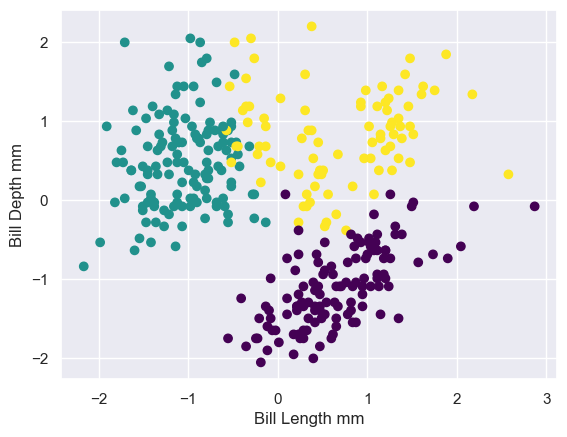

In [9]:
from sklearn.cluster import KMeans

X = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
Xn = (X-X.mean())/X.std()
kmeans = KMeans(n_clusters=3, init='random', n_init = 10, random_state = 42)
clusters = kmeans.fit_predict(Xn) 


plt.scatter(Xn['bill_length_mm'], Xn['bill_depth_mm'], c=clusters, cmap='viridis')
plt.xlabel('Bill Length mm')
plt.ylabel('Bill Depth mm')

### Exercise 2

Using similar calculations as for the digits modelling, calculate the accuracy of the `KMeans()` model and plot the confusion matrix for this classification. You should get an accuracy of approximately 91%. (2 marks)

C:\Users\bathe\AppData\Local\Temp\ipykernel_6180\2072775028.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(penguins.code[mask])[0]


Accuracy score is 0.9152046783625731


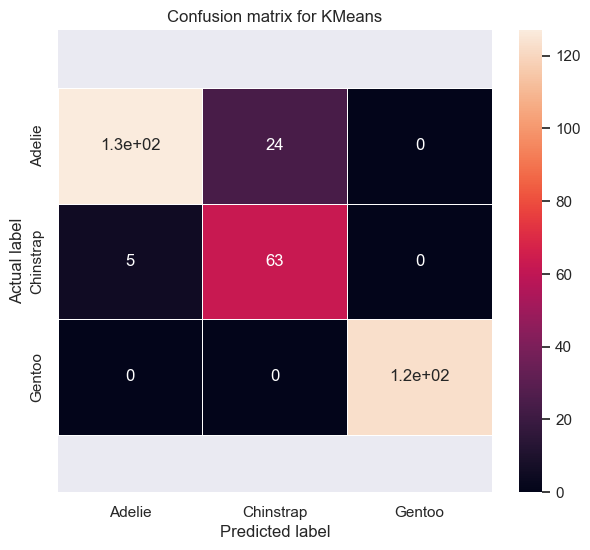

In [11]:
from sklearn.metrics import accuracy_score

labels = np.zeros_like(clusters) 

for i in range(3): # loop over the indicies for the clusters
    # find the index of all points in the current cluster
    mask = clusters == i
    # find the most common label(mode) for the points in the current cluster
    # and assign that as the predicted label for the points in the current cluster
    # we take the first value in the array, as the could be multiple modes
    labels[mask] = mode(penguins.code[mask])[0]
    
# Load true labels
true_labels = penguins['code'].values

# Calculate accuracy
accuracy = accuracy_score(true_labels, labels)
print("Accuracy score is", accuracy)

# Plot confusion matrix
cnf_matrix = confusion_matrix(penguins.code, labels)
plt_confusion_matrix(cnf_matrix, ['Adelie', 'Chinstrap','Gentoo'], 'KMeans')


### Exercise 3

Calculate the first two principal components for the dataset, and repeat the calculation of the accuracy in Exercises 1 and 2 using this decomposition.  You should get an accuracy of approximately 80%. (2 marks)

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
Xn_pca = pca.fit_transform(Xn)
kmeans = KMeans(n_clusters=3, init='random', n_init=10, random_state=42)
clusters = kmeans.fit_predict(Xn_pca)

true_labels = penguins['code'].values
labels = np.zeros_like(clusters) # create an array of zeros of the same size as clusters
for i in range(3): # loop over the indicies for the clusters
    # find the index of all points in the current cluster
    mask = clusters == i
    # find the most common label(mode) for the points in the current cluster
    # and assign that as the predicted label for the points in the current cluster
    # we take the first value in the array, as the could be multiple modes
    labels[mask] = mode(penguins.code[mask])[0]

accuracy = accuracy_score(true_labels, labels)
print("Accuracy score is", accuracy)

Accuracy score is 0.8801169590643275


C:\Users\bathe\AppData\Local\Temp\ipykernel_6180\1434931048.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(penguins.code[mask])[0]


### Exercise 4

Plot the decision boundaries for the model in Exercise 3, and overlay a scatter plot of the actual labels. (2 marks)

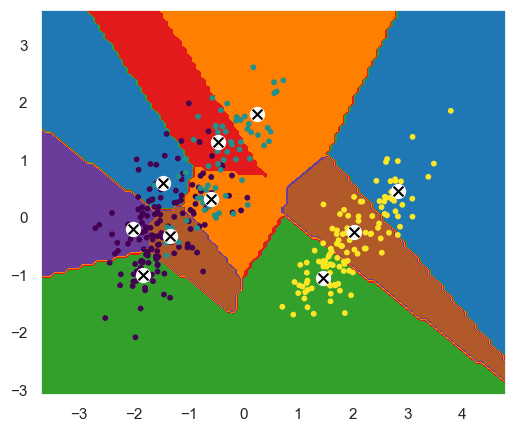

In [18]:
kmeans = KMeans(n_clusters=10) # instantatiate the model with default values and 5 clusters
kmeans.fit(Xn_pca) # fit the data to the model
y_kmeans = kmeans.predict(Xn_pca) # use the model to predict labels for each cluster

x_min, x_max = Xn_pca[:, 0].min() - 1, Xn_pca[:, 0].max() + 1 # find the minimum and maximum of the first feature
y_min, y_max = Xn_pca[:, 1].min() - 1, Xn_pca[:, 1].max() + 1 # find the minimum and maximum of the second feature
# create a rectangular grid which goes from the minimum to maximum values in step-size of h
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100)) 

fig = plt.figure(figsize=(6, 5)) # set up a figure of size 10 x 5
plt_decision_boundaries(kmeans,xx,yy) # plot the decision boundaries
# scatter plot of the data points coloured by their true values
plt.scatter(Xn_pca[:,0], Xn_pca[:,1], s=10, c=true_labels, cmap='viridis') 
# get the values of the centers from the model
centers = kmeans.cluster_centers_
# plot the centre posititions with a black cross on a white circle
plt.scatter(centers[:,0], centers[:,1], c='white', s=100, alpha=1.)
plt.scatter(centers[:,0], centers[:,1], c ='black', marker='x', s=50);

### Exercise 5

Using similar calculations as for the `blobs` dataset, calculate how the inertia varies with the chosen number of clusters. (2 marks)

C:\Users\bathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


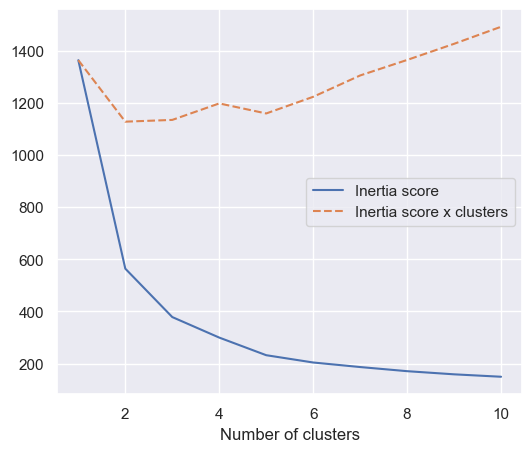

In [19]:
nclusters = np.arange(1,11) # create an array of the number clusters to investigate
inertia_score = [] # initialize an array for the inertia score
for ncl in nclusters: # loop over the number of clusters
    # instantatiate KMeans with ncl clusters
    kmeans = KMeans(n_clusters=ncl)
    kmeans.fit(Xn) # fit the data to the model
    # obtain the inertia score from the model and append the current value to the 
    # array inertia_score
    inertia_score.append(kmeans.inertia_) 

fig = plt.figure(figsize=(6,5)) # set up a figure of size 6 x 5
# plot the inertia score and nclusters*(inertia score)
plt.plot(nclusters,inertia_score,'-',label='Inertia score')
plt.plot(nclusters,nclusters*inertia_score,'--',label='Inertia score x clusters')
plt.legend() # put a legend in the best place
plt.xlabel('Number of clusters'); # add an x label